SOCIAL MEDIA AND MENTAL HEALTH INDICATORS DATASET

INTRODUCTION

This dataset explores how social media activity, screen-time patterns, and daily lifestyle habits relate to mental well-being. It includes variables such as time spent online, quality of social interactions, and sleep duration, allowing for a comprehensive analysis of digital behavior and its potential psychological impact. Researchers and students can use this dataset to identify behavioral trends, uncover correlations between online habits and emotional health, and build predictive models for mental health assessment.

IMPORT THE NECESSARY LIBRARIES

In [2]:
# remove the warning massage
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

IMPORT DATASET

In [3]:
df=pd.read_csv("E:\Datascience\Dataset\mental_health_social_media_dataset.csv")

DISPLAY THE FIRST 5 ROWS OF THE DATASET

In [4]:
print(df.head())


        person_name  age       date  gender   platform  daily_screen_time_min  \
0     Reyansh Ghosh   35   1/1/2024    Male  Instagram                    320   
1        Neha Patel   24  1/12/2024  Female  Instagram                    453   
2      Ananya Naidu   26   1/6/2024    Male   Snapchat                    357   
3          Neha Das   66  1/17/2024  Female   Snapchat                    190   
4  Reyansh Banerjee   31  1/28/2024    Male   Snapchat                    383   

   social_media_time_min  negative_interactions_count  \
0                    160                            1   
1                    226                            1   
2                    196                            1   
3                    105                            0   
4                    211                            1   

   positive_interactions_count  sleep_hours  physical_activity_min  \
0                            2          7.4                     28   
1                            3

In [5]:
#Removed column physicl activity min
df = df.drop(columns=['physical_activity_min'])


DISPLAY THE LAST 5 ROWS OF THE DATASET

In [6]:
print(df.tail())

       person_name  age       date  gender  platform  daily_screen_time_min  \
4995     Sai Menon   42  1/21/2025  Female  WhatsApp                    254   
4996   Neha Ansari   33  1/26/2025  Female    TikTok                    330   
4997  Aarav Sharma   13   2/6/2025    Male    TikTok                    403   
4998  Aadhya Patil   21  2/17/2025    Male    TikTok                    476   
4999   Shaurya Das   42  2/28/2025  Female    TikTok                    249   

      social_media_time_min  negative_interactions_count  \
4995                     64                            0   
4996                    214                            1   
4997                    262                            2   
4998                    309                            2   
4999                    162                            1   

      positive_interactions_count  sleep_hours  anxiety_level  stress_level  \
4995                            1          7.7              1             5   
4996  

DATA CLEANING

In [7]:
#check whether there are any missing values
print(df.isna().sum())

person_name                    0
age                            0
date                           0
gender                         0
platform                       0
daily_screen_time_min          0
social_media_time_min          0
negative_interactions_count    0
positive_interactions_count    0
sleep_hours                    0
anxiety_level                  0
stress_level                   0
mood_level                     0
mental_state                   0
dtype: int64


In [8]:
#Check for duplicates rows
print(df.duplicated().sum())

0


DATA UNDERSTANDING

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  anxiety_level                5000 non-null   int64  
 11  stress_level                 5000 non-null   int64  
 12  mood_level                   5000 non-null   int64  
 13  mental_state      

In [10]:
#Use summary satistics to understand distribitutions
df.describe()

,age,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,anxiety_level,stress_level,mood_level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,29.947800,373.058200,175.331600,0.864200,1.835400,7.134660,2.510400,7.107600,5.625800
std,12.279936,106.003916,71.209329,0.555176,0.943443,0.533184,0.794996,1.062378,0.759928
min,13.000000,140.000000,35.000000,0.000000,0.000000,6.400000,1.000000,5.000000,4.000000
25%,21.000000,310.000000,118.000000,1.000000,1.000000,6.700000,2.000000,6.000000,5.000000
50%,27.000000,388.000000,170.000000,1.000000,2.000000,7.100000,3.000000,7.000000,6.000000
75%,35.250000,461.000000,231.000000,1.000000,2.000000,7.450000,3.000000,8.000000,6.000000
max,69.000000,520.000000,338.000000,2.000000,4.000000,8.300000,4.000000,9.000000,7.000000


In [11]:
#What is the average daily screen time of users?
df['daily_screen_time_min'].mean()

373.0582

In [12]:
#Which age group has the highest average stress level?
df.groupby('age')['stress_level'].mean().sort_values(ascending=False).head()

age
24    7.975207
25    7.974359
22    7.958678
23    7.958015
19    7.950943
Name: stress_level, dtype: float64

In [13]:
#Is there a correlation between social median and anxiety level?
df[['social_media_time_min','anxiety_level']].corr()

,social_media_time_min,anxiety_level
social_media_time_min,1.000000,0.896964
anxiety_level,0.896964,1.000000


In [14]:
#what is the average sleep duration of users with high stress levels?
df[df['stress_level']>=8]['sleep_hours'].mean() #overall is 7.13

6.707522123893805

In [15]:
#Do people with more positive interactions have better mood levels?
df.groupby('positive_interactions_count')['mood_level'].mean()

positive_interactions_count
0    7.000000
1    6.157447
2    5.356584
3    4.916155
4    5.000000
Name: mood_level, dtype: float64

In [16]:
#Which gender spends the most time on social media on average?
df.groupby('gender')['social_media_time_min'].mean().sort_values(ascending=False)

gender
Male      175.480841
Female    175.232821
Other     174.141414
Name: social_media_time_min, dtype: float64

In [17]:
#Which platform has the most total social media usage minutes?
df.groupby('platform')['social_media_time_min'].sum().sort_values(ascending=False)

platform
TikTok       175207
YouTube      158930
Snapchat     141972
Instagram    131010
Twitter      103541
Facebook      98093
WhatsApp      67905
Name: social_media_time_min, dtype: int64

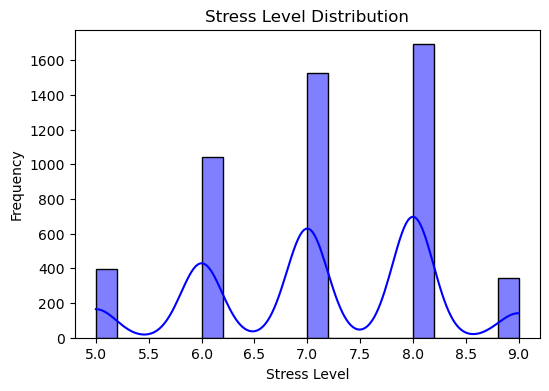

In [18]:
#What is the distribution of stress_level values?
plt.figure(figsize=(6,4))
sns.histplot(df['stress_level'], bins=20, kde=True,color='blue')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()


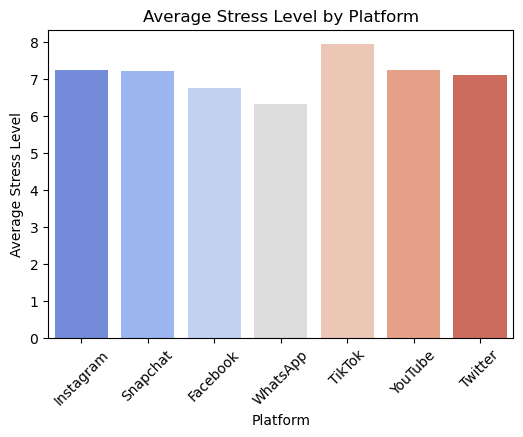

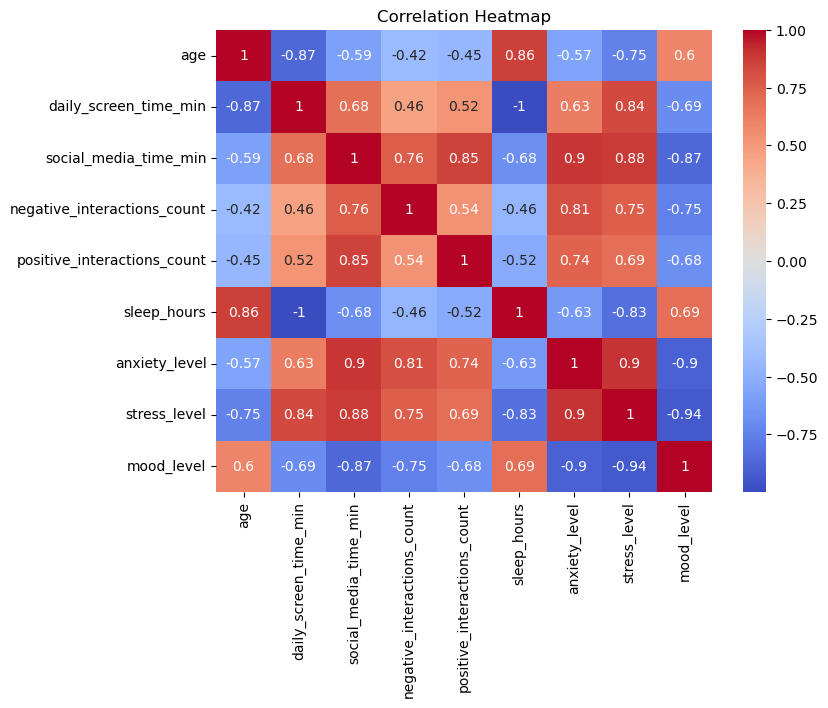

In [19]:
#Bar plot of average stress level per Platform
plt.figure(figsize=(6,4))
sns.barplot(x='platform', y='stress_level', data=df, estimator='mean', ci=None,palette='coolwarm')
plt.title('Average Stress Level by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Stress Level')
plt.xticks(rotation=45)
plt.show()

# Heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


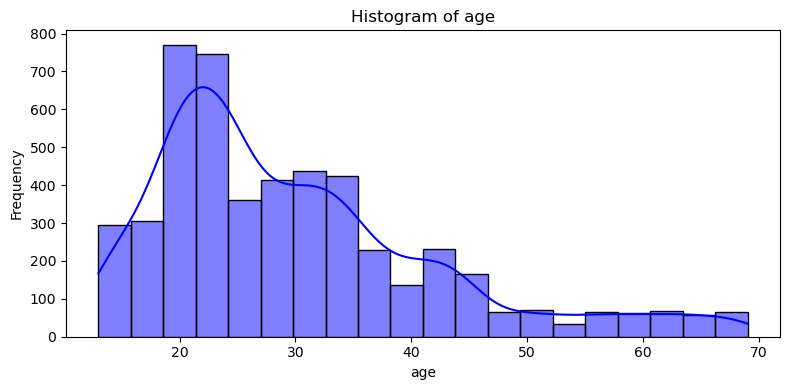

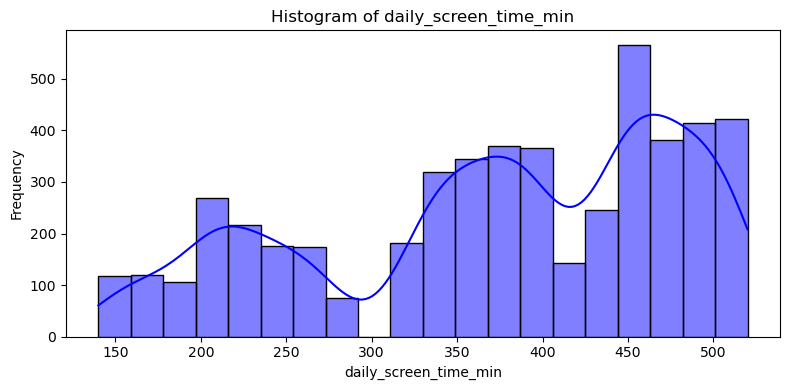

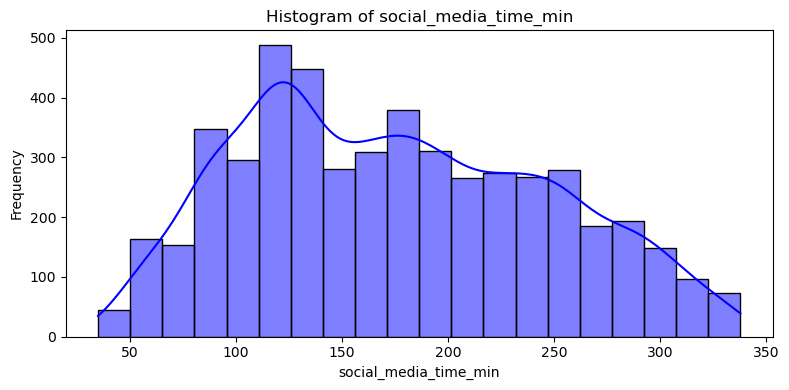

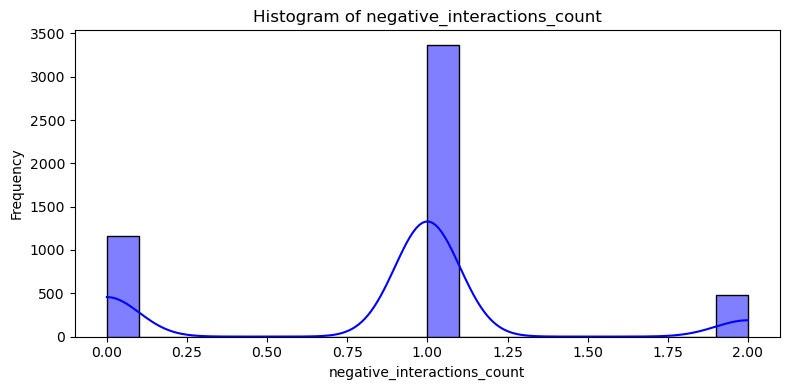

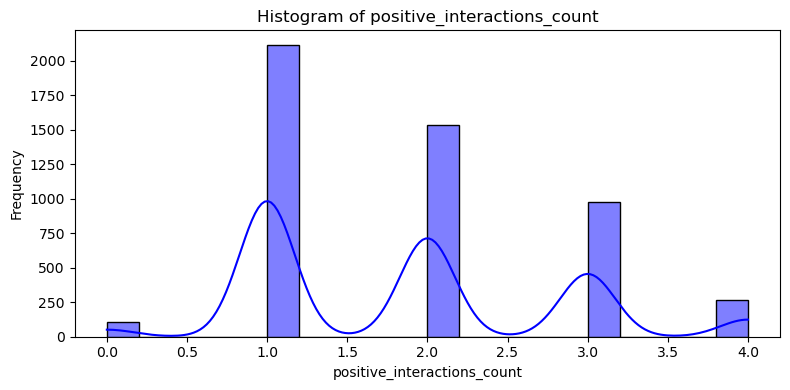

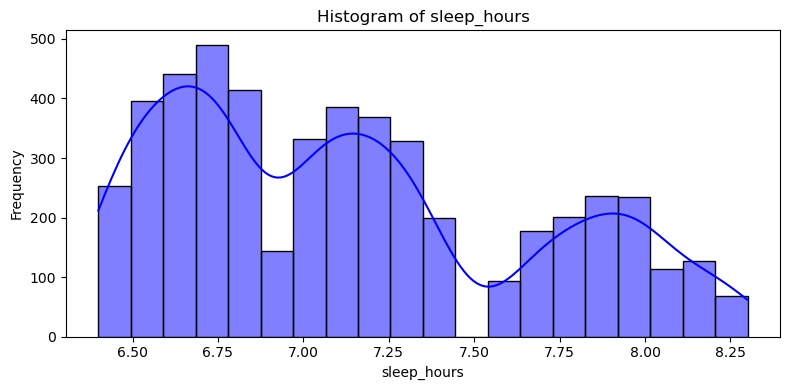

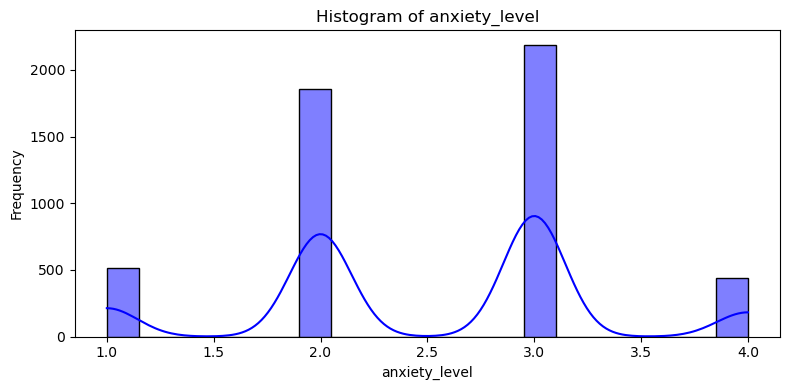

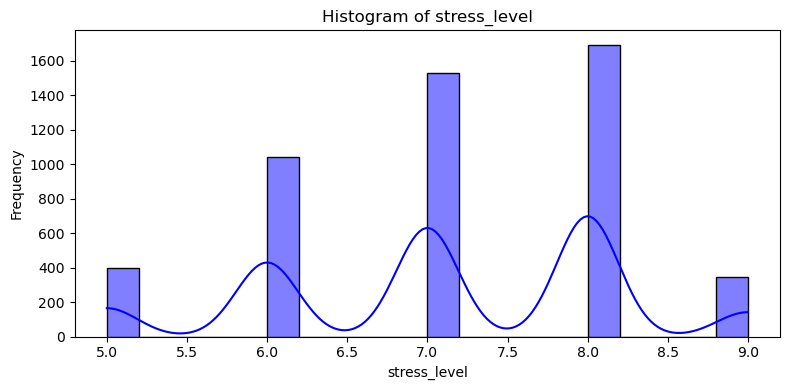

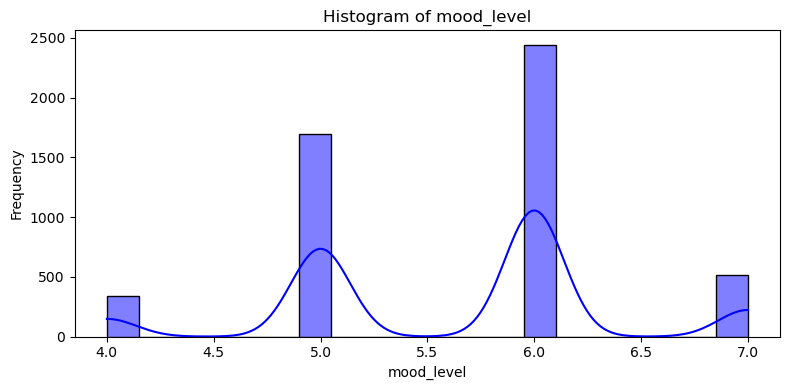

In [20]:
numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20,color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

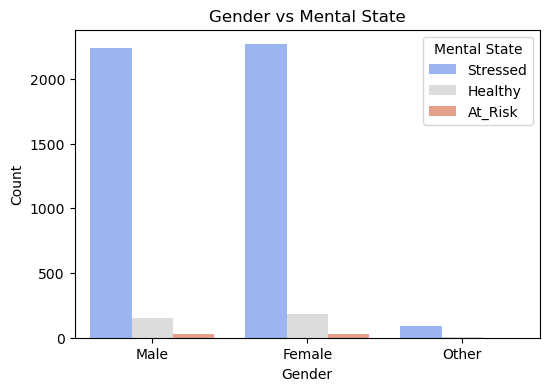

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='mental_state',palette='coolwarm')
plt.title('Gender vs Mental State')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Mental State')
plt.show()


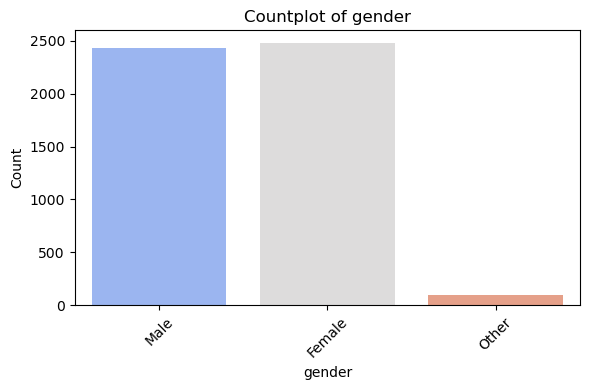

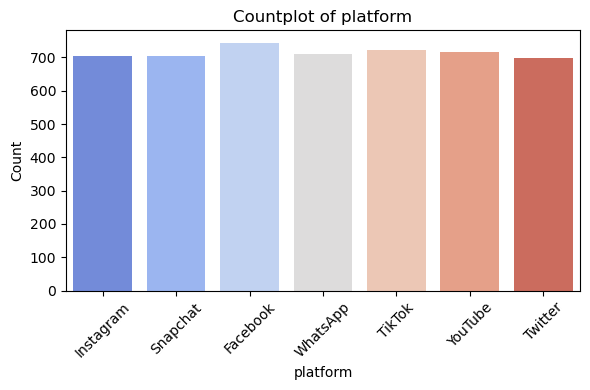

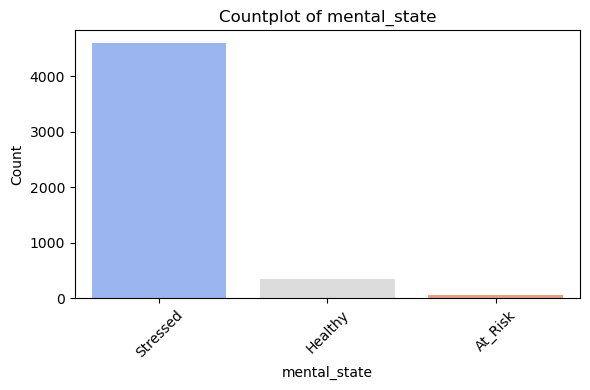

In [22]:
categorical_cols = ['gender', 'platform', 'mental_state']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col,palette='coolwarm')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

OUTLIER DETECTION

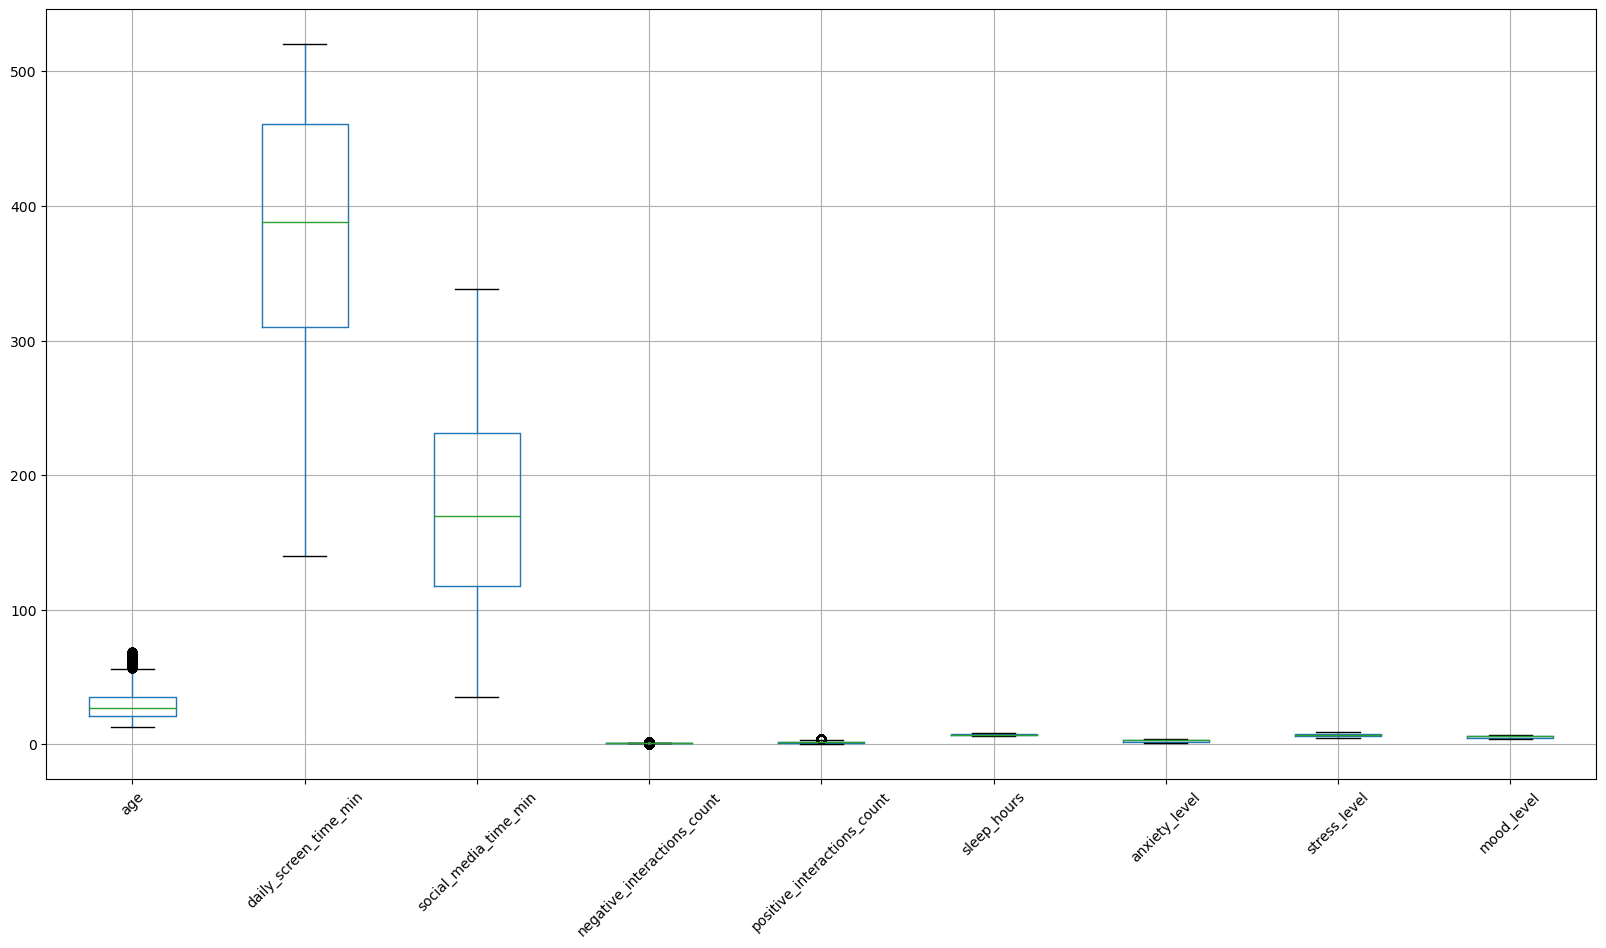

In [23]:
# plot boxplot for checking outliers
df.boxplot(figsize=(20,10))
plt.xticks(rotation=45)
plt.show()

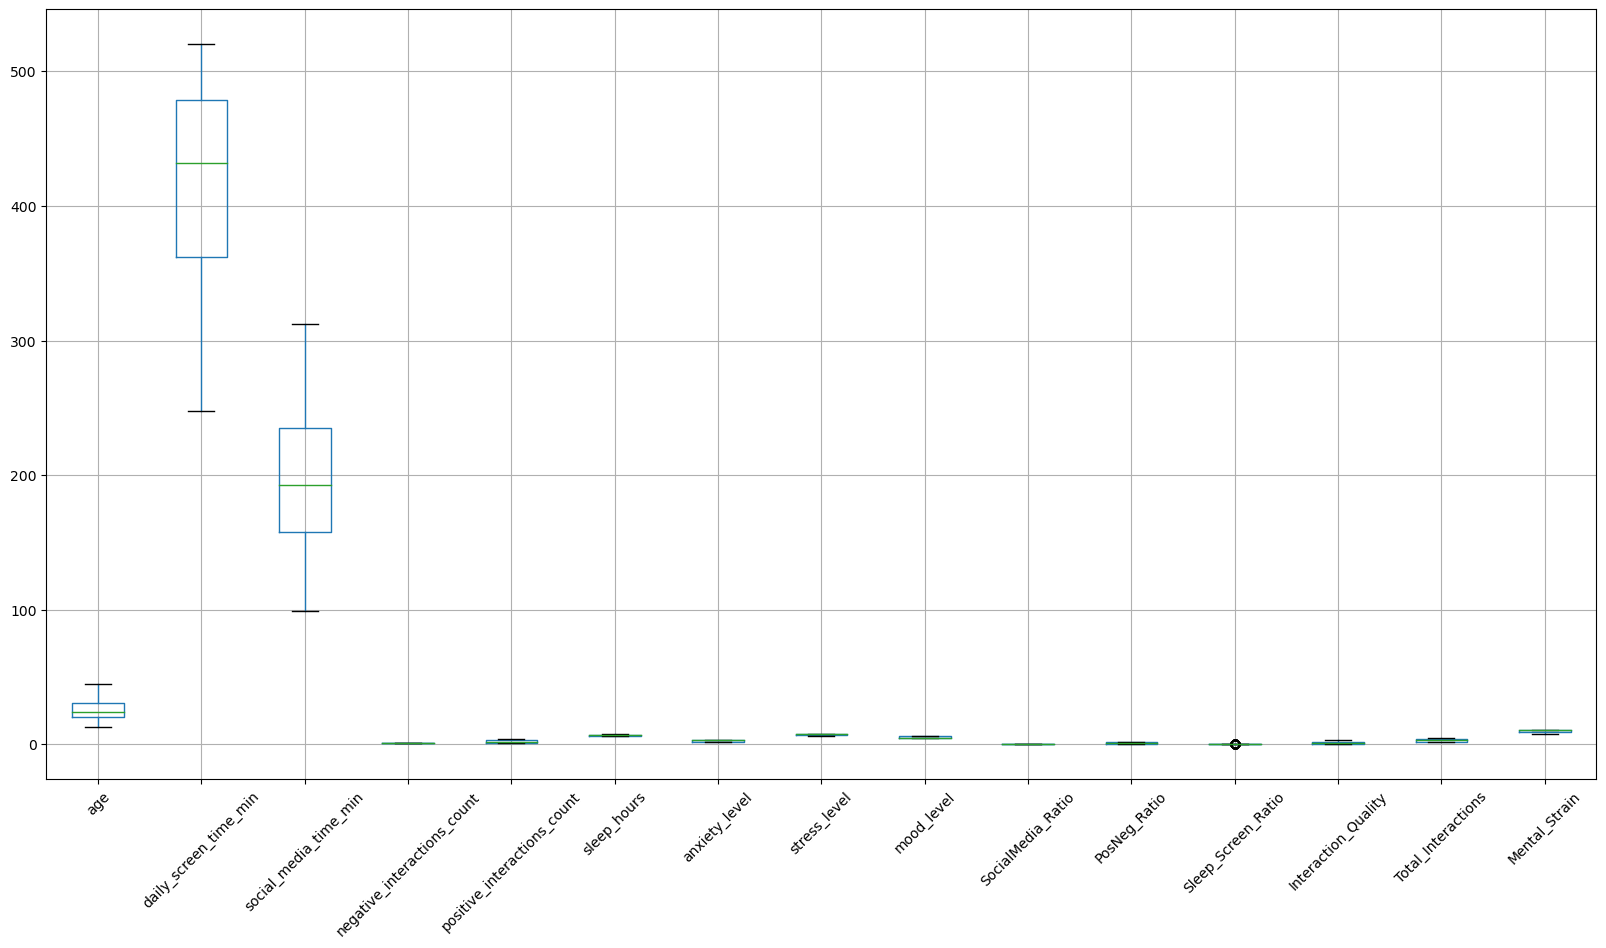

In [26]:

numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df.boxplot(figsize=(20,10))
plt.xticks(rotation=45)
plt.show()


FEATURE ENGINEERING

In [27]:
# 1. Ratio features
df['SocialMedia_Ratio'] = df['social_media_time_min'] / df['daily_screen_time_min']
df['PosNeg_Ratio'] = df['positive_interactions_count'] / (df['negative_interactions_count'] + 1)
df['Sleep_Screen_Ratio'] = df['sleep_hours'] / (df['daily_screen_time_min'] + 1)

# 2. Interaction features
df['Interaction_Quality'] = df['positive_interactions_count'] - df['negative_interactions_count']
df['Total_Interactions'] = df['positive_interactions_count'] + df['negative_interactions_count']

# 3. Mental health combined features
df['Mental_Strain'] = df['stress_level'] + df['anxiety_level']
df['Mood_Adjusted_Stress'] = df['stress_level'] / (df['mood_level'] + 1)

# 4. Encode categorical variables
df['Gender_Code'] = df['gender'].astype('category').cat.codes
df['Platform_Code'] = df['platform'].astype('category').cat.codes
df['MentalState_Code'] = df['mental_state'].astype('category').cat.codes

# Preview
print(df.head())



        person_name  age       date  gender   platform  daily_screen_time_min  \
0     Reyansh Ghosh   35   1/1/2024    Male  Instagram                    320   
1        Neha Patel   24  1/12/2024  Female  Instagram                    453   
2      Ananya Naidu   26   1/6/2024    Male   Snapchat                    357   
4  Reyansh Banerjee   31  1/28/2024    Male   Snapchat                    383   
5         Myra Kale   25   2/8/2024  Female   Snapchat                    516   

   social_media_time_min  negative_interactions_count  \
0                    160                            1   
1                    226                            1   
2                    196                            1   
4                    211                            1   
5                    284                            1   

   positive_interactions_count  sleep_hours  ...  SocialMedia_Ratio  \
0                            2          7.4  ...           0.500000   
1                           

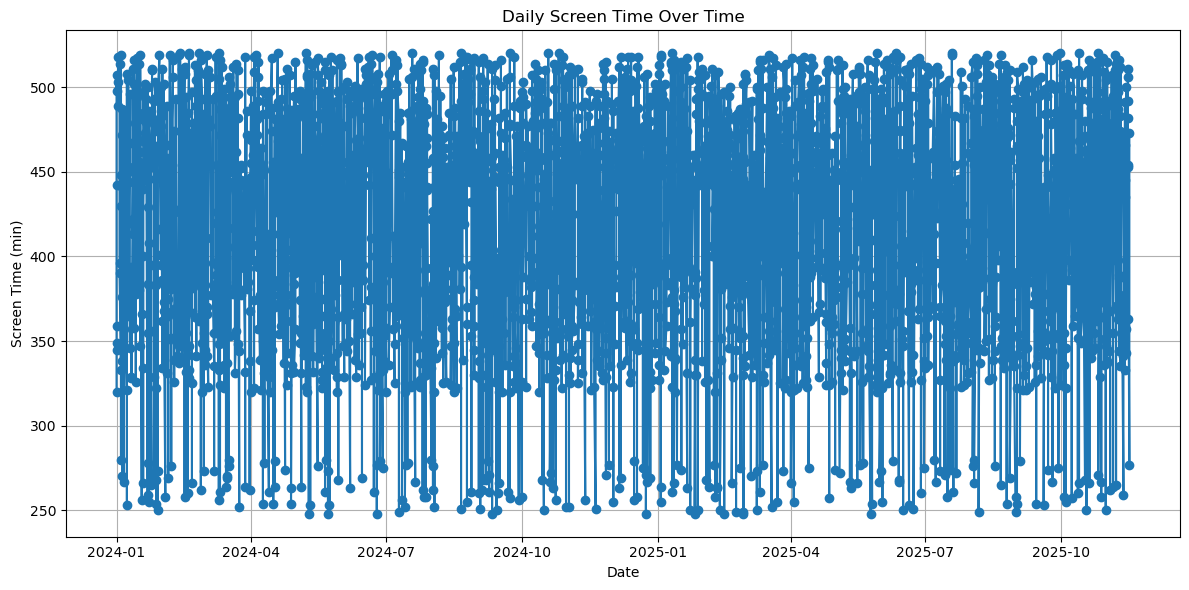

In [28]:
# Time Series Plots — Detect Temporal Patterns

# Convert date column to datetime (if not already)
df['date'] = pd.to_datetime(df['date'])

# Sort by date
df_sorted = df.sort_values('date')

# Plot Daily Screen Time Over Time
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['date'], df_sorted['daily_screen_time_min'], marker='o')
plt.title("Daily Screen Time Over Time")
plt.xlabel("Date")
plt.ylabel("Screen Time (min)")
plt.grid(True)
plt.tight_layout()
plt.show()


SUGGESTIONS & RECOMMENDATION

1. Reduce Excessive Screen Time

Observation:
High daily_screen_time_min and social_media_time_min are strongly linked with increased anxiety_level and stress_level.

Recommendation:

Educate users on healthy screen-time habits.

Introduce screen-time reminders or digital detox suggestions.

Encourage replacing late-night screen usage with better sleep routines.

2. Address Negative Interaction Patterns

Observation:
Users with high negative_interactions_count and low positive_interactions_count show poor mood_level and higher stress.

Recommendation:

Promote positive content and supportive community engagement.

Use ML models to identify users experiencing high negativity and provide wellness nudges.

Flag toxic activity patterns for moderation.

3. Sleep and Lifestyle Optimization

Observation:
Lower sleep_hours combined with high screen time increases mental_strain (stress + anxiety).

Recommendation:

Provide personalized sleep hygiene tips.

Introduce sleep–screen balance trackers.

Show alerts when late-night social media usage becomes excessive.

4. Emotional State & Platform Influence

Observation:
Different platforms show different emotional outcomes—for example, some platforms correlate with higher mood swings.

Recommendation:

Study platform-wise behavior patterns.

Offer platform-specific wellness guidelines.

Encourage shifting time toward platforms with better interaction quality.

5. Improve Overall Mental State Tracking

Observation:
Users with unstable mental_state categories often show low mood_level, high stress_level, or uneven interaction quality.

Recommendation:

Implement regular check-ins to capture emotional state.

Provide personalized content to improve mood.

Use trend analysis to detect early signs of mental distress.